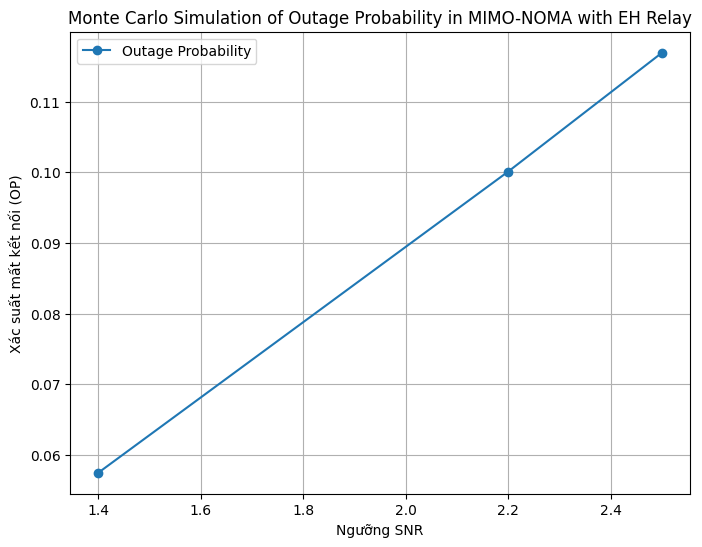

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def nakagami_m_fading(m, omega, size=1):
    """ Sinh biến ngẫu nhiên Nakagami-m theo phân phối Gamma """
    return np.random.gamma(shape=m, scale=omega/m, size=size)

# Các tham số mô phỏng
num_realizations = 10000  # Số lần mô phỏng Monte Carlo
m_SR, m_RU = 1, 1  # Hệ số Nakagami-m cho hai chặng truyền
N_S, N_Rr, N_Rt, N_U = 2, 2, 2, 3  # Số ăng-ten tại các nút, với N_U = 3
Ps = 10  # Công suất trạm gốc
sigma2 = 1  # Nhiễu nền
w = 0.5  # Tỷ lệ phân chia công suất tại relay
xi = 0.02  # Sai số SIC
gamma_threshold = [1.4, 2.2, 2.5]  # Ngưỡng SNR cho các người dùng

# Mảng lưu kết quả OP
outage_probabilities = np.zeros(len(gamma_threshold))

for _ in range(num_realizations):
    # Mô phỏng kênh Nakagami-m cho chặng BS -> Relay và Relay -> User
    h_SR = nakagami_m_fading(m_SR, omega=1, size=(N_S, N_Rr))
    h_RU = nakagami_m_fading(m_RU, omega=1, size=(N_Rt, N_U))

    # Chọn cặp ăng-ten có tín hiệu mạnh nhất
    max_h_SR = np.max(h_SR)
    max_h_RU = np.max(h_RU, axis=0)

    # Tính công suất nhận tại relay
    P_R = w * max_h_SR * Ps  # Công suất thu hoạch năng lượng tại tiếp sóng
    G = np.sqrt(P_R / ((1 - w) * Ps * max_h_SR + sigma2))  # Hệ số khuếch đại

    # Tính SNR tại các người dùng
    for k in range(len(gamma_threshold)):
        snr_k = (G**2 * (1 - w) * max_h_SR * max_h_RU[k] * Ps) / (xi + sigma2)
        if snr_k < gamma_threshold[k]:
            outage_probabilities[k] += 1

# Tính OP trung bình
outage_probabilities /= num_realizations

# Vẽ đồ thị kết quả
plt.figure(figsize=(8, 6))
plt.plot(gamma_threshold, outage_probabilities, marker='o', linestyle='-', label='Outage Probability')
plt.xlabel('Ngưỡng SNR')
plt.ylabel('Xác suất mất kết nối (OP)')
plt.title('Monte Carlo Simulation of Outage Probability in MIMO-NOMA with EH Relay')
plt.legend()
plt.grid()
plt.show()